In [1]:
import numpy as np
import os
import random
import torch

from torch.utils.data import DataLoader, random_split
from torchvision import transforms

from Callbacks import EarlyStopping
from TransferLearningModel import TransferLearningModel
from utils import DICOMCoarseDataset

In [2]:
# BASE_DIR = "C:/Users/Dominik Hahn/OneDrive/Studium/Master/Masterarbeit/Daten"
BASE_DIR = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Daten"
seed = 41
batch_size = 32
classes = ["nodule", "non-nodule"]
train_ratio = 0.6
scenario = 1

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

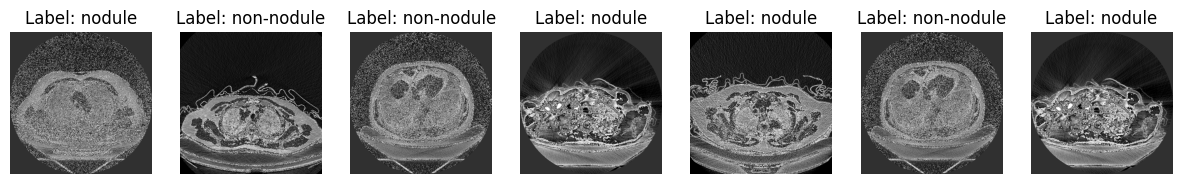

In [3]:
# dataset = DICOMCoarseDataset(root_dir=BASE_DIR, num_images_per_class=len(os.listdir(os.path.join(BASE_DIR, "nodule"))), classes=classes, scenario=scenario)
dataset = DICOMCoarseDataset(root_dir=BASE_DIR, num_images_per_class=10, classes=classes, scenario=scenario)
dataset.visualize_images(num_images=7)

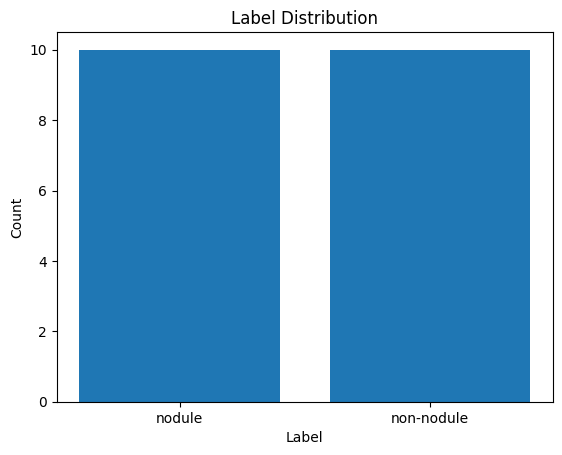

In [4]:
dataset.display_label_distribution()

In [5]:
train_size = int(train_ratio * len(dataset))
val_size = int(((1-train_ratio)/2) * len(dataset)) 
test_size = len(dataset) - train_size - val_size

print(f"Train size: {train_size} --- Validation size: {val_size} --- Test size: {test_size}")

Train size: 12 --- Validation size: 4 --- Test size: 4


In [8]:
model = TransferLearningModel(classes, "unet", data_augmentation=False, fine=False, scenario=scenario)

# Ensure transforms are correctly applied based on model requirements
model.train_transforms, model.test_transforms = model.get_transforms()
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Apply specific transforms to each subset
train_dataset.dataset.transform = model.train_transforms
val_dataset.dataset.transform = model.test_transforms
test_dataset.dataset.transform = model.test_transforms

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize early stopping
early_stopping = EarlyStopping(patience=10)

# Train the current model
model.train(train_loader, val_loader, early_stopping, epochs=50)


Epoch 1/50 ----- Loss: 0.6933, Accuracy: 50.00% ----- Validation Loss: 0.6930, Validation Accuracy: 50.00%
Epoch 2/50 ----- Loss: 0.6932, Accuracy: 50.00% ----- Validation Loss: 0.6929, Validation Accuracy: 50.00%
Epoch 3/50 ----- Loss: 0.6932, Accuracy: 50.00% ----- Validation Loss: 0.6929, Validation Accuracy: 50.00%
Epoch 4/50 ----- Loss: 0.6931, Accuracy: 50.00% ----- Validation Loss: 0.6928, Validation Accuracy: 50.00%
Epoch 5/50 ----- Loss: 0.6930, Accuracy: 50.00% ----- Validation Loss: 0.6928, Validation Accuracy: 50.00%
Epoch 6/50 ----- Loss: 0.6929, Accuracy: 50.00% ----- Validation Loss: 0.6928, Validation Accuracy: 50.00%
Epoch 7/50 ----- Loss: 0.6929, Accuracy: 50.00% ----- Validation Loss: 0.6927, Validation Accuracy: 50.00%
Epoch 8/50 ----- Loss: 0.6928, Accuracy: 50.00% ----- Validation Loss: 0.6927, Validation Accuracy: 50.00%
Epoch 9/50 ----- Loss: 0.6927, Accuracy: 50.00% ----- Validation Loss: 0.6927, Validation Accuracy: 50.00%
Epoch 10/50 ----- Loss: 0.6927, Accur

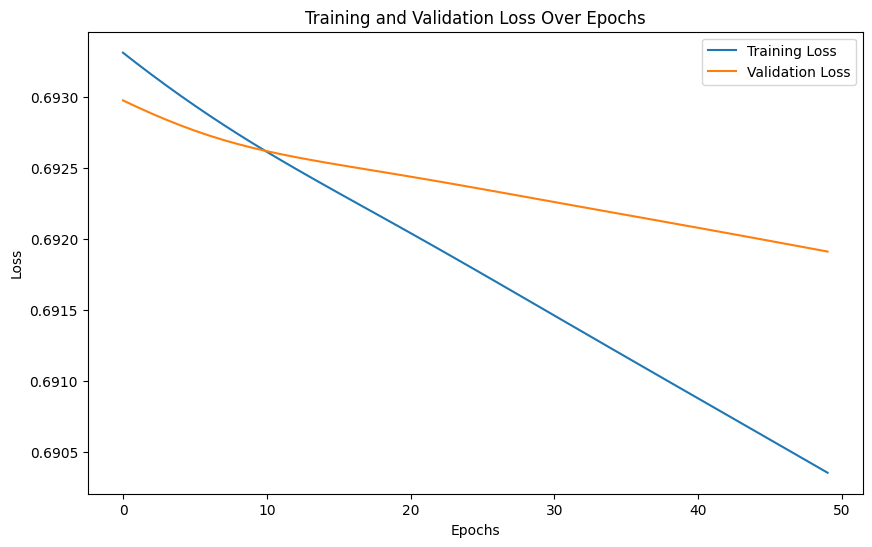

In [9]:
model.plot_loss()

Evaluation Accuracy on unseen data: 50.0


<Figure size 1000x800 with 0 Axes>

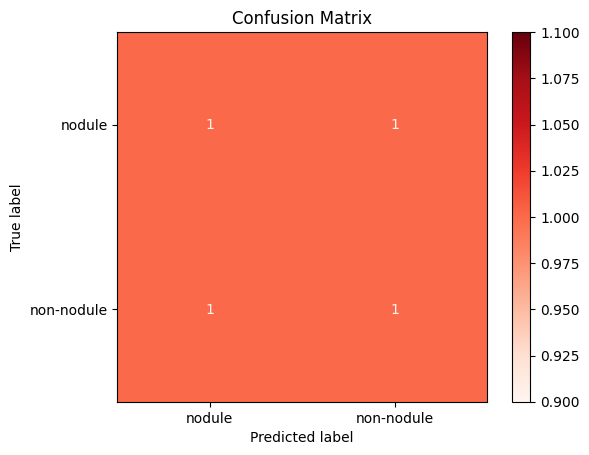

In [10]:
model.evaluate(test_loader)